Notre objectif est de créer une intelligence artificielle capable de réaliser des bons scores au jeu UnderTheLine. Ce jeu à été imaginé et implémenté dans le cadre du projet Python de première année de l'ENSAE. Pour ce faire nous allons faire appel à un algorithme évolutionniste. L'idée est de générer aléatoirement un ensemble d'individus que l'on teste en les faisant jouer au jeu. Les plus mauvais sont écartés et les meilleurs sont gardés et mutés afin de créer la deuxième génération. En itérant ce processus, on crée une lignée qui joue de mieux en mieux au jeu. La vitesse de progression de la lignée dépend en grande partie de la structure des individus. Nous avons choisi comme intelligence des individus un réseau de neurones simple. Les algorithmes de neuroevolution correctement implémentés fonctionnent de manière quasi-certaine, néanmoins, il sont très longs car requièrent une grande quantité de calcul. D'après la litterature, les premiers individus interressant apparaissent au bout de plusieurs centaines de milliers de générations. L'enjeu est assuremment d'optimiser le temps de calcul. Nous allons profiter de l'indépendance de chaque individu au sein d'une génération pour paralleliser leur évaluation sur gpu.

In [1]:
import matplotlib as plt
%matplotlib inline
from IPython.display import Image
from evolution import Evolution

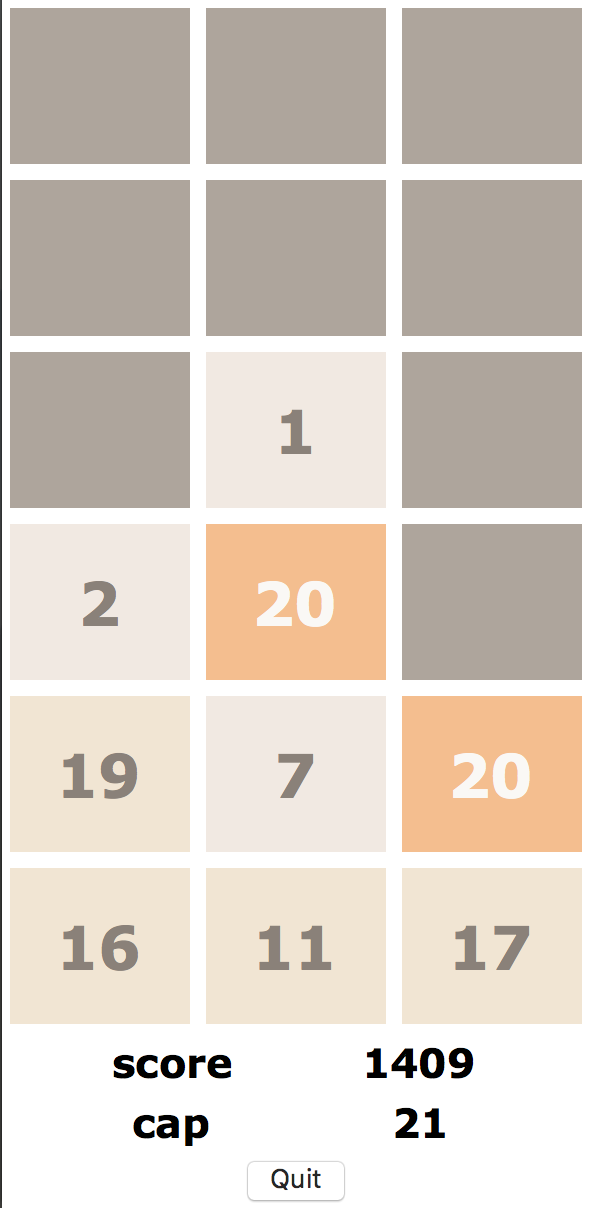

In [2]:
Image("img/game.png", width=200, height=200)

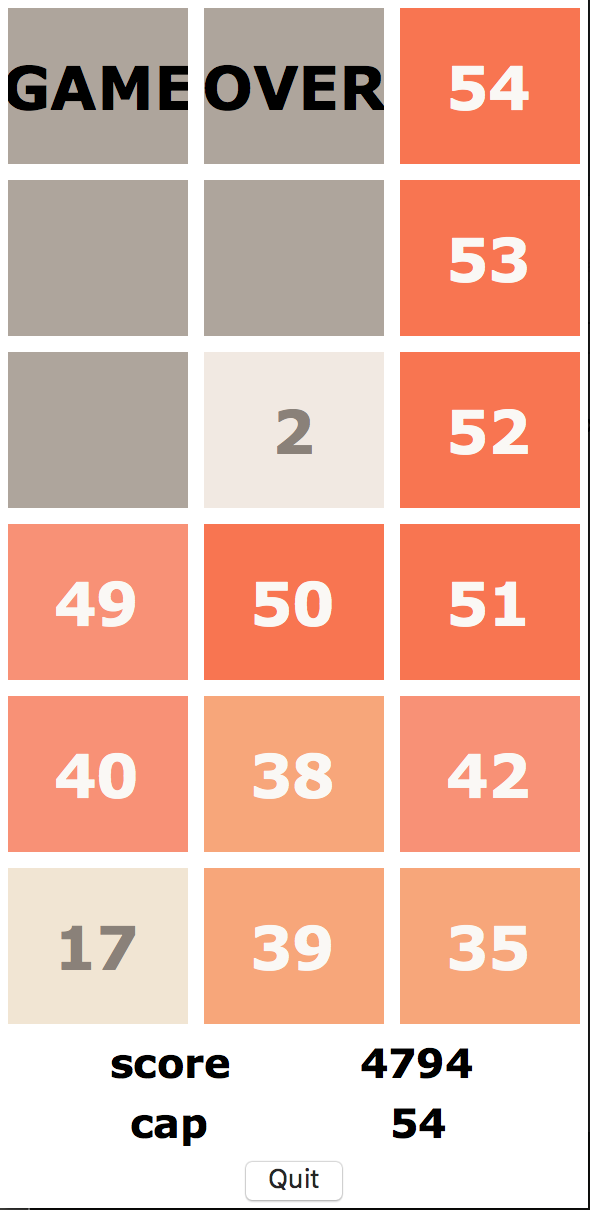

In [3]:
Image("img/gameover.png", width=200, height=200)

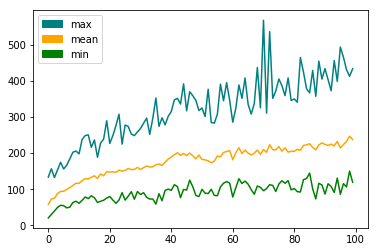

In [4]:
evolution = Evolution(
    generation_nb=100,
    generation_size=50,
    game_per_generation=10,
    row_nb=6,
    column_nb=3,
    cap=7
)

evolution.train()

L'output du réseau de neurone correspond aux différents coups possibles.

Les cases les plus hautes ne sont pas déplacables car si il en existe une, la partie est finie.

Les cases tombent systémtiquement, ainsi, les déplacements vers le haut sont equivalentes aux déplacements vers le bas. Il existe donc (n-1)xp différents coups latéraux possibles.

On ne peut pas non plus déplacer les cases toutes à gauche vers la gauche, il existe donc (n-1)x(p-1) coups vers la gauche et, par symétrie, 2(n-1)x(p-1) différents coups horizontaux possibles.

Il y a donc enfin (n-1)x(3p-2) différents coups possibles.